In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'retina',}

In [2]:
picked_mode = pd.read_csv('picked_mode.dat', skiprows=5, delim_whitespace=True, dtype='float')
picked_mode2 = pd.read_csv('picked_mode2.dat', skiprows=5, delim_whitespace=True, dtype='float')
picked_mode.columns = picked_mode2.columns
picked_mode = picked_mode.ix[picked_mode['t_step']>=2800000.]
picked_mode.reset_index(inplace=True, drop=True)
picked_mode = picked_mode.append(picked_mode2)
picked_mode.reset_index(drop=True, inplace=True)

In [3]:
picked_mode.head()

,t_step,time,radius_ID,radius,degree,order,velocity_pol,velocity_tor,velocity_pol_dr,temperature,pressure,vorticity_pol,vorticity_tor,vorticity_pol_dr,magnetic_field_pol,magnetic_field_tor,magnetic_field_pol_dr,grad_temp_pol,grad_temp_tor,grad_temp_pol_dr
0,2800000.0,1.4,1.0,0.538462,0.0,0.0,0.0,0.0,0.0,1.000000,275.380373,0.0,0.0,0.0,0.0,0.0,0.0,-3.335700,0.0,0.500000
1,2800000.0,1.4,2.0,0.538729,0.0,0.0,0.0,0.0,0.0,0.996921,275.177016,0.0,0.0,0.0,0.0,0.0,0.0,-3.336082,0.0,0.498461
2,2800000.0,1.4,3.0,0.539532,0.0,0.0,0.0,0.0,0.0,0.987705,274.585966,0.0,0.0,0.0,0.0,0.0,0.0,-3.336948,0.0,0.493853
3,2800000.0,1.4,4.0,0.540869,0.0,0.0,0.0,0.0,0.0,0.972413,273.649404,0.0,0.0,0.0,0.0,0.0,0.0,-3.336143,0.0,0.486207
4,2800000.0,1.4,5.0,0.542739,0.0,0.0,0.0,0.0,0.0,0.951174,272.400697,0.0,0.0,0.0,0.0,0.0,0.0,-3.326858,0.0,0.475587


In [4]:
source = 1.0 # is this what I want??
nr = 97
ilevel = picked_mode.ix[:, 2]
radius = picked_mode.ix[0:96, 3]
temp = picked_mode.ix[:, 9]
flux = picked_mode.ix[:, 17]
Tprime2 = picked_mode.ix[:, 19]
nentry = len(ilevel)

In [5]:
Tavg = dict()
qavg = dict()
qprimeavg = dict()

In [6]:
for i in range(1, 98):
    Tavg[i] = 0
    qavg[i] = 0
    qprimeavg[i] = 0

In [7]:
for k in range(0,nentry):
    Tavg[int(ilevel[k])] += float(temp[k])
    qavg[int(ilevel[k])] += float(flux[k])
    qprimeavg[int(ilevel[k])] += float(Tprime2[k])

In [8]:
navg = nentry/ nr
for i in Tavg.keys():
    Tavg[i] = Tavg[i]/navg
    qavg[i] = qavg[i]/navg
    qprimeavg[i] = qprimeavg[i]/navg

In [9]:
Trms = 0
for i in range(0, 96):
    ravg = 0.5 * (float(radius[i]) + float(radius[i+1]))
    dr = float(radius[i+1]) - float(radius[i])
    Tbar = 0.5 * (Tavg[int(ilevel[i])] + Tavg[int(ilevel[i])+1])
    Trms = Trms + 4 * np.pi * ravg**2 * dr * Tbar**2
    
V = 4 * np.pi * (float(radius[96])**3 - float(radius[0])**3)/3
Trms/V

0.09238829518454407

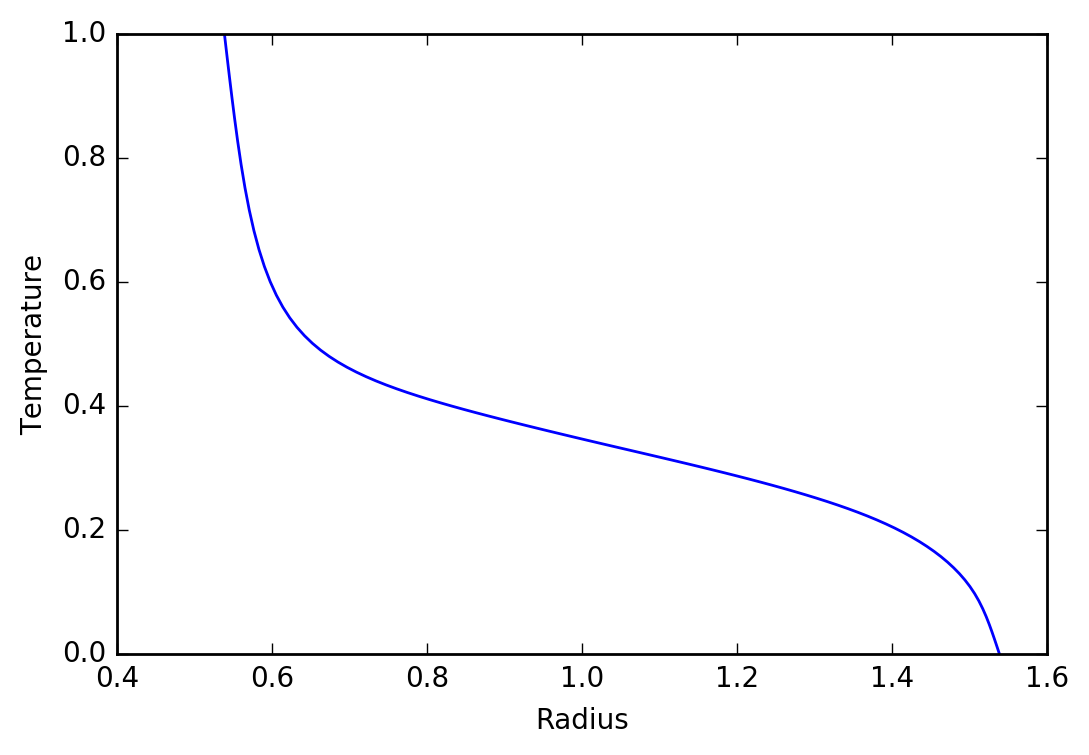

In [10]:
plt.plot(radius.tolist(), list(Tavg.values()))
plt.xlabel('Radius')
plt.ylabel('Temperature')
plt.savefig('source_Tprofile.pdf')
plt.show()

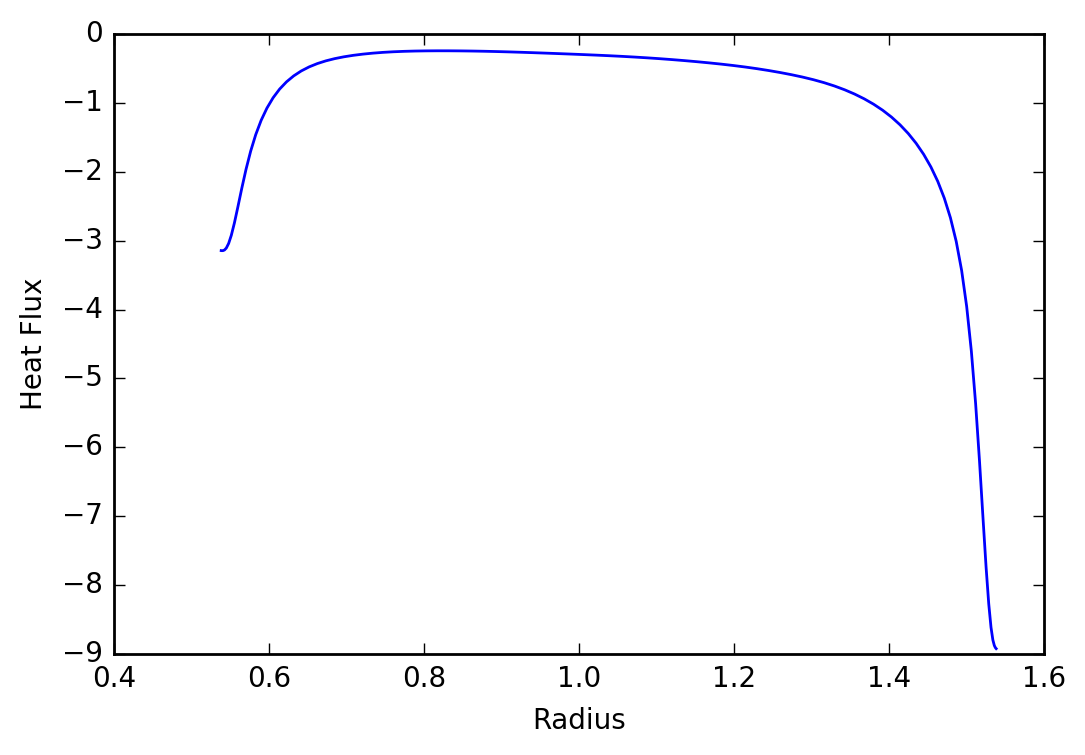

In [11]:
plt.plot(radius.tolist(), list(qavg.values()))
plt.xlabel('Radius')
plt.ylabel('Heat Flux')
plt.savefig('source_Qprofile.pdf')
plt.show()

In [22]:
print(list(qavg.values())[0])
print(list(qavg.values())[-1])

-3.144041265615617
-8.922230156782351


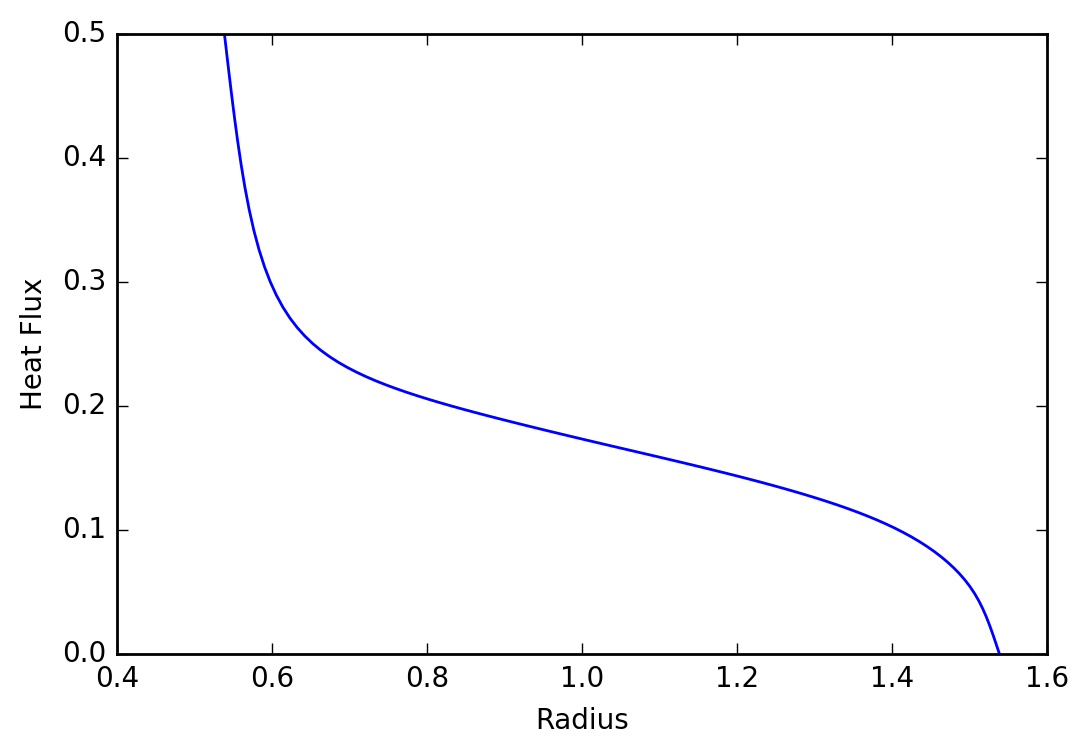

In [13]:
plt.plot(radius.tolist(), list(qprimeavg.values()))
plt.xlabel('Radius')
plt.ylabel('Heat Flux')
plt.savefig('source_Qprime_profile.pdf')
plt.show()

In [14]:
x = np.array([list(Tavg.values()), radius.tolist()]) 

In [15]:
xprime = np.diff(x)

In [16]:
h_flux = (x[1][0:-1]**2)*(xprime[0]/xprime[1])

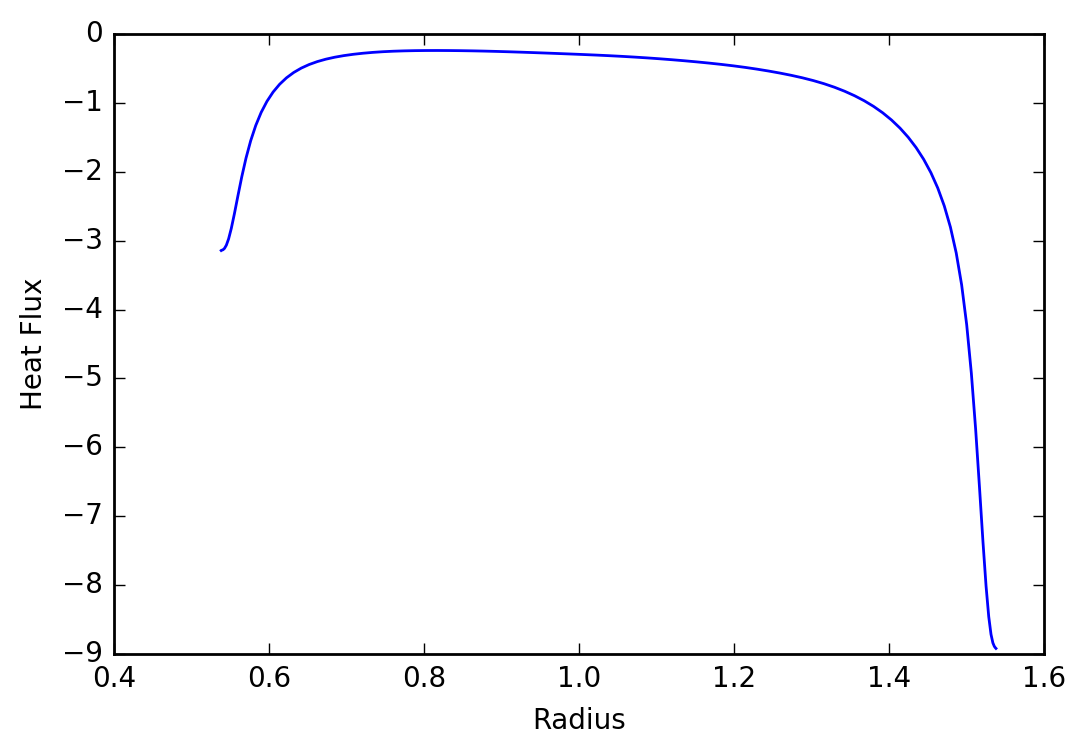

In [17]:
plt.plot(radius.tolist()[0:-1], h_flux)
plt.xlabel('Radius')
plt.ylabel('Heat Flux')
plt.show()

In [18]:
cdim = radius[0]/radius[nr-1]
qb2 = source * (radius[nr-1]**2)/6
r2 = radius**2
tmp = 1 - cdim
c1 = radius[0]*(1 - qb2*(1 - cdim**2))/(1 - cdim)
c2 = qb2 - c1/radius[nr-1]
Tc = (c1/radius) + c2 - (source/6)*r2

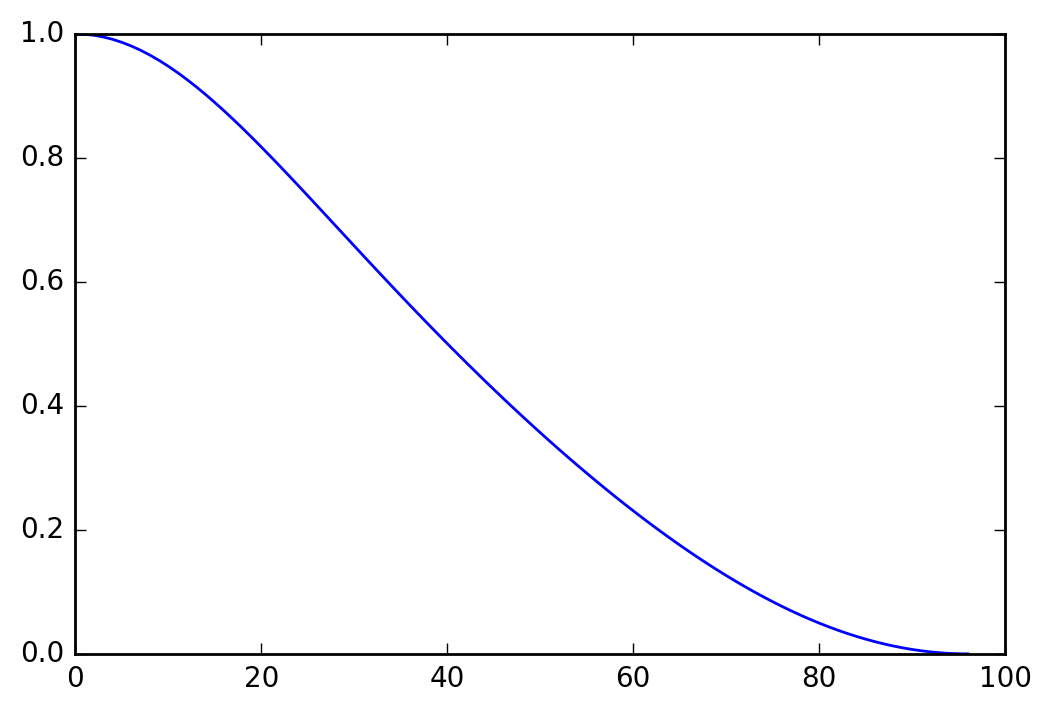

In [19]:
plt.plot(Tc.index.tolist(), Tc.values.tolist())
plt.show()